# Thread scaling

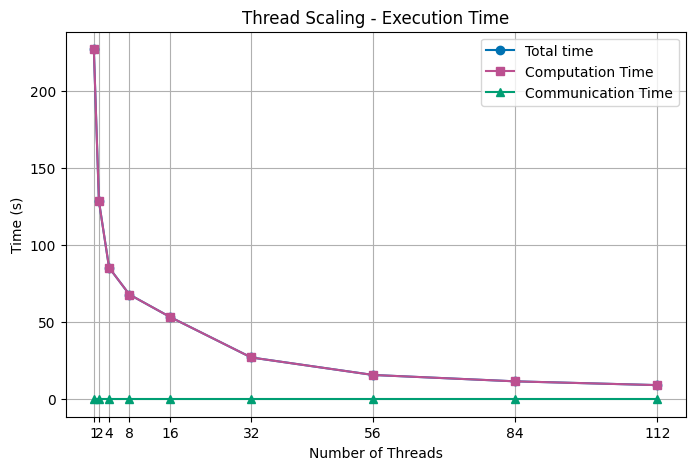

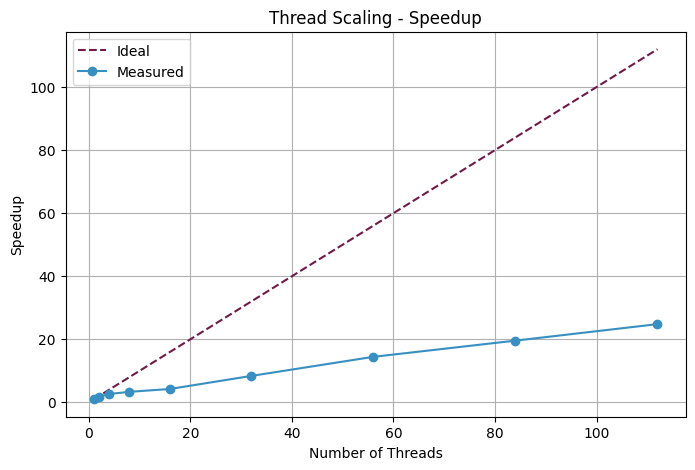

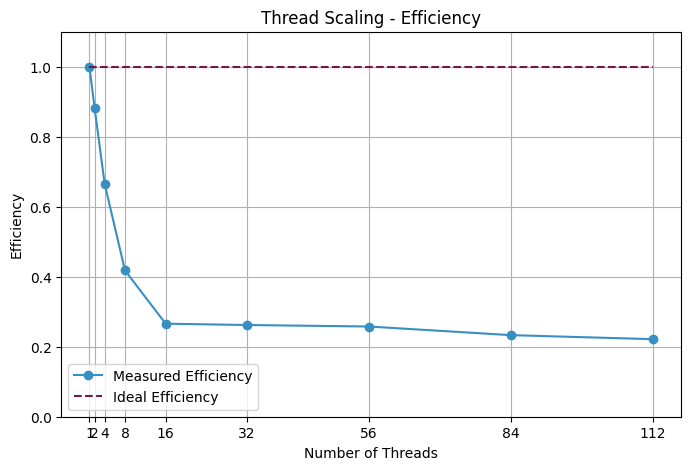

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


colors = {
    "total": "#0072B2",   # azul
    "comp":  "#bc5090",   # naranja
    "comm":  "#009E73",   # verde
    "ideal": "#701A49",   # magenta
    "measured": "#388FC2" # azul claro
}

# csv file
df_thread = pd.read_csv("output/thread_scaling.csv")

# sort by OMP_THREADS
df_thread_sorted = df_thread.sort_values("OMP_THREADS").reset_index(drop=True)

# --- TIME PLOT: total, computation, and communication ---
plt.figure(figsize=(8,5))
plt.plot(df_thread_sorted["OMP_THREADS"], df_thread_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total time")
plt.plot(df_thread_sorted["OMP_THREADS"], df_thread_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_thread_sorted["OMP_THREADS"], df_thread_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
plt.xlabel("Number of Threads")
plt.ylabel("Time (s)")
plt.title("Thread Scaling - Execution Time")
plt.grid(True)
plt.xticks(df_thread_sorted["OMP_THREADS"])
plt.legend()
plt.show()

# --- SPEEDUP PLOT ---
serial_time = df_thread_sorted["Max_total_time"].iloc[0]  # time with 1 thread
speedup = serial_time / df_thread_sorted["Max_total_time"]

plt.figure(figsize=(8,5))
plt.plot(df_thread_sorted["OMP_THREADS"], df_thread_sorted["OMP_THREADS"], color=colors["ideal"], linestyle='--', label='Ideal')
plt.plot(df_thread_sorted["OMP_THREADS"], speedup, marker="o", color=colors["measured"], label="Measured")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Thread Scaling - Speedup")
plt.grid(True)
plt.legend()
plt.show()

# Efficiency
efficiency = speedup / df_thread_sorted["OMP_THREADS"]
plt.figure(figsize=(8,5))
plt.plot(df_thread_sorted["OMP_THREADS"], efficiency, marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_thread_sorted["OMP_THREADS"], [1]*len(df_thread_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Threads")
plt.ylabel("Efficiency")
plt.title("Thread Scaling - Efficiency")
plt.grid(True)
plt.ylim(0, 1.1)
plt.xticks(df_thread_sorted["OMP_THREADS"])
plt.legend()
plt.show()






# Weak scaling

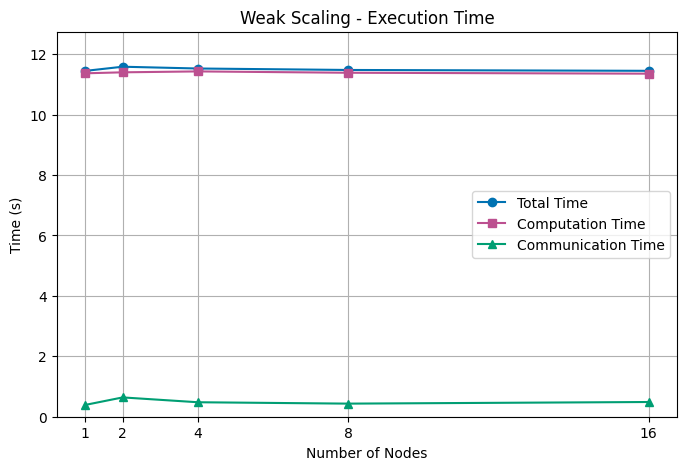

In [2]:
# csv file
df_weak = pd.read_csv("output/weak_scaling.csv")

# sort by Ntasks
# df_weak_sorted = df_weak.sort_values("Ntasks")

TASKS_PER_NODE = 8
df_weak["Nodes"] = df_weak["Ntasks"] // TASKS_PER_NODE
df_weak_sorted = df_weak.sort_values("Nodes")

# Plot
plt.figure(figsize=(8,5))
plt.plot(df_weak_sorted["Nodes"], df_weak_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total Time")
plt.plot(df_weak_sorted["Nodes"], df_weak_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_weak_sorted["Nodes"], df_weak_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.ylim(0, df_weak_sorted["Max_total_time"].max() * 1.1)
plt.title("Weak Scaling - Execution Time")
plt.grid(True)
plt.xticks(df_weak_sorted["Nodes"])
plt.legend()
plt.show()

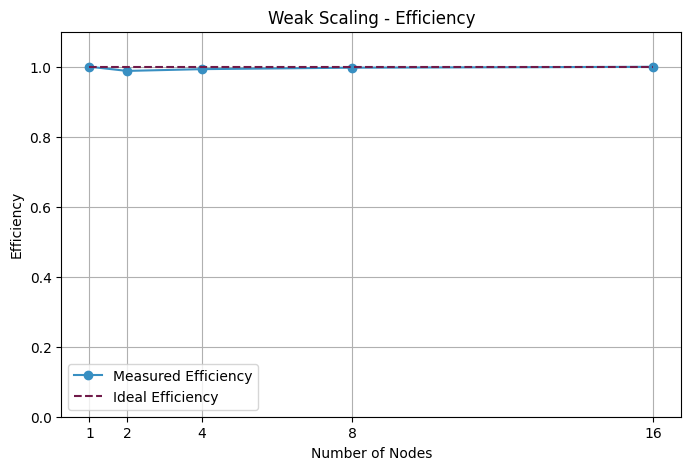

In [3]:
t1 = df_weak_sorted["Max_total_time"].iloc[0]  # time with 1 node
df_weak_sorted["Efficiency"] = t1 / df_weak_sorted["Max_total_time"] 

# Plot efficiency
plt.figure(figsize=(8,5))
plt.plot(df_weak_sorted["Nodes"], df_weak_sorted["Efficiency"], marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_weak_sorted["Nodes"], [1]*len(df_weak_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Nodes")
plt.ylabel("Efficiency")
plt.title("Weak Scaling - Efficiency")
plt.legend()
plt.grid(True)
plt.xticks(df_weak_sorted["Nodes"])
plt.ylim(0, 1.1)
plt.show()


# Strong scaling

#### Case 1: Grid Size 15000x15000

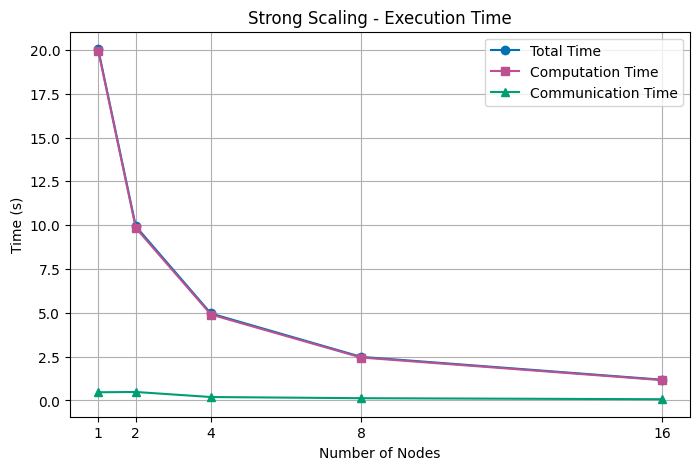

In [4]:
df_strong = pd.read_csv("output/strong_scaling_15000.csv")

TASKS_PER_NODE = 8
df_strong["Nodes"] = df_strong["Ntasks"] // TASKS_PER_NODE
df_strong_sorted = df_strong.sort_values("Nodes")

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
# Annotate each point with percentage
#for i, row in df_strong_sorted.iterrows():
#    percent = 100 * row["Max_Communication_time"] / row["Max_total_time"]
#    plt.text(row["Nodes"], row["Max_Communication_time"] + 0.05, f"{percent:.1f}%", ha='center', fontsize=9)

plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Strong Scaling - Execution Time")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

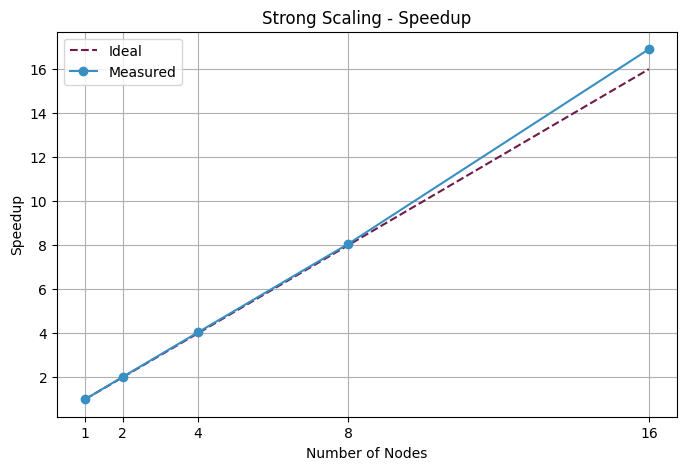

In [5]:
# speedup
t1_strong = df_strong_sorted["Max_total_time"].iloc[0]  # time with 1 node
df_strong_sorted["Speedup"] = t1_strong / df_strong_sorted["Max_total_time"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Nodes"], color=colors["ideal"], linestyle='--', label='Ideal')
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Speedup"], marker="o", color=colors["measured"], label="Measured")
plt.xlabel("Number of Nodes")
plt.ylabel("Speedup")
plt.title("Strong Scaling - Speedup")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

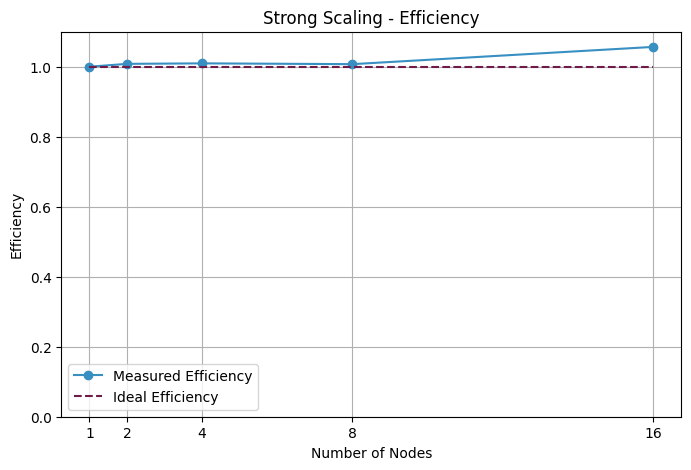

In [6]:
# Efficiency
df_strong_sorted["Efficiency"] = df_strong_sorted["Speedup"] / df_strong_sorted["Nodes"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Efficiency"], marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_strong_sorted["Nodes"], [1]*len(df_strong_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Nodes")
plt.ylabel("Efficiency")
plt.title("Strong Scaling - Efficiency")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.ylim(0, 1.1)
plt.show()


#### Case 2: Grid Size 3000x30000

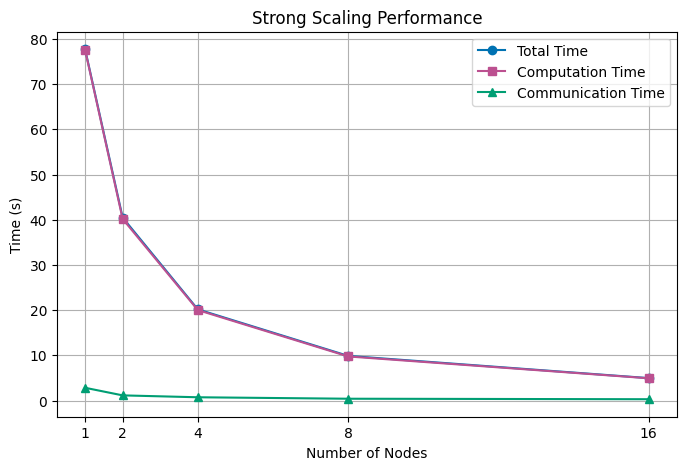

In [8]:
df_strong = pd.read_csv("output/strong_scaling_30000.csv")

TASKS_PER_NODE = 8
df_strong["Nodes"] = df_strong["Ntasks"] // TASKS_PER_NODE
df_strong_sorted = df_strong.sort_values("Nodes")

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
# Annotate each point with percentage
#for i, row in df_strong_sorted.iterrows():
#    percent = 100 * row["Max_Communication_time"] / row["Max_total_time"]
#    plt.text(row["Nodes"], row["Max_Communication_time"] + 0.05, f"{percent:.1f}%", ha='center', fontsize=9)

plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Strong Scaling Performance")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

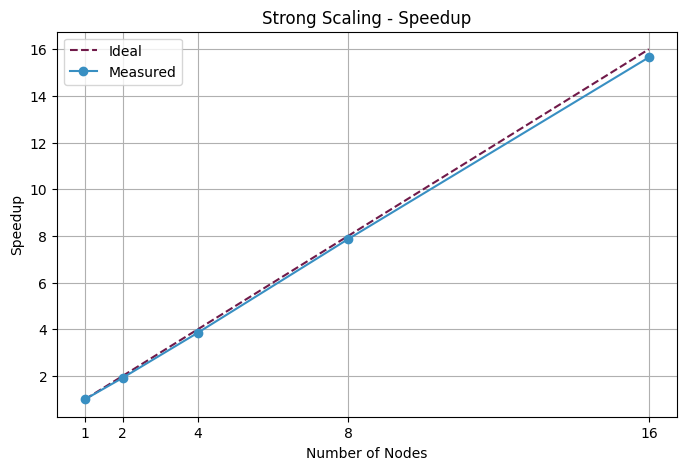

In [9]:
# speedup
t1_strong = df_strong_sorted["Max_total_time"].iloc[0]  # time with 1 node
df_strong_sorted["Speedup"] = t1_strong / df_strong_sorted["Max_total_time"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Nodes"], color=colors["ideal"], linestyle='--', label='Ideal')
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Speedup"], marker="o", color=colors["measured"], label="Measured")
plt.xlabel("Number of Nodes")
plt.ylabel("Speedup")
plt.title("Strong Scaling - Speedup")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

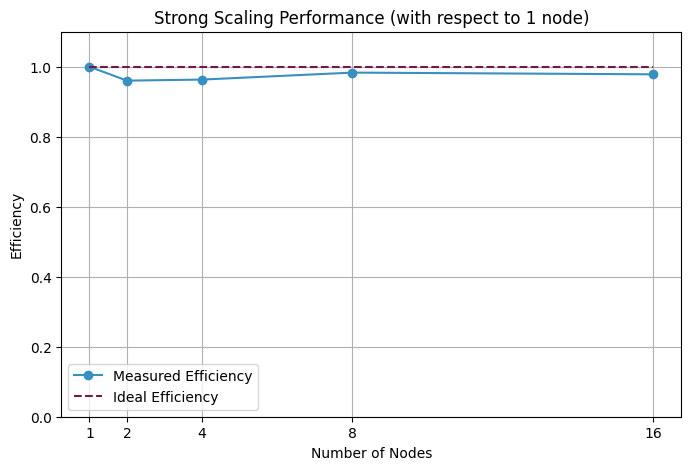

In [ ]:
# Efficiency
df_strong_sorted["Efficiency"] = df_strong_sorted["Speedup"] / df_strong_sorted["Nodes"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Efficiency"], marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_strong_sorted["Nodes"], [1]*len(df_strong_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Nodes")
plt.ylabel("Efficiency")
plt.title("Strong Scaling - Efficiency")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.ylim(0, 1.1)
plt.show()


#### Case 3: Grid Size 17000x17000

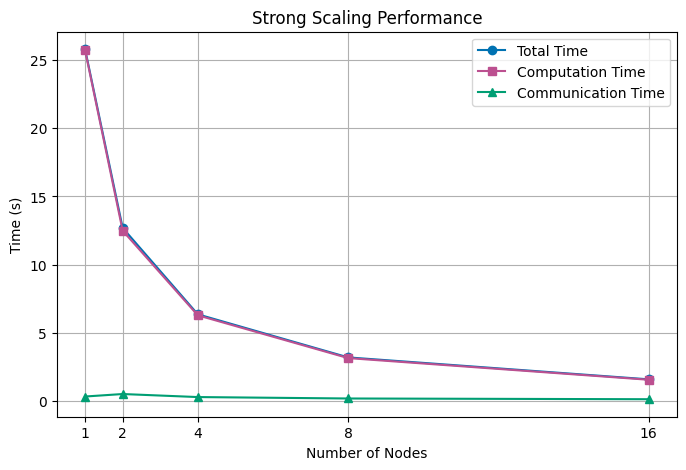

In [63]:
df_strong = pd.read_csv("output/strong_scaling_17000.csv")

TASKS_PER_NODE = 8
df_strong["Nodes"] = df_strong["Ntasks"] // TASKS_PER_NODE
df_strong_sorted = df_strong.sort_values("Nodes")

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
# Annotate each point with percentage
#for i, row in df_strong_sorted.iterrows():
#    percent = 100 * row["Max_Communication_time"] / row["Max_total_time"]
#    plt.text(row["Nodes"], row["Max_Communication_time"] + 0.05, f"{percent:.1f}%", ha='center', fontsize=9)

plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Strong Scaling Performance")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

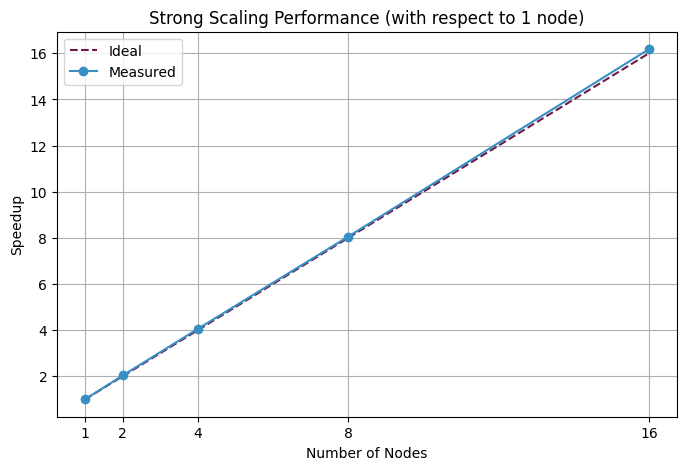

In [64]:
# speedup
t1_strong = df_strong_sorted["Max_total_time"].iloc[0]  # time with 1 node
df_strong_sorted["Speedup"] = t1_strong / df_strong_sorted["Max_total_time"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Nodes"], color=colors["ideal"], linestyle='--', label='Ideal')
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Speedup"], marker="o", color=colors["measured"], label="Measured")
plt.xlabel("Number of Nodes")
plt.ylabel("Speedup")
plt.title("Strong Scaling Performance (with respect to 1 node)")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

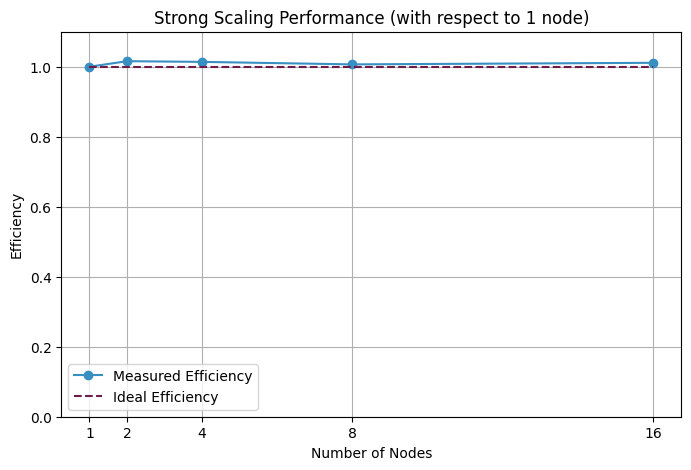

In [65]:
# Efficiency
df_strong_sorted["Efficiency"] = df_strong_sorted["Speedup"] / df_strong_sorted["Nodes"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Efficiency"], marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_strong_sorted["Nodes"], [1]*len(df_strong_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Nodes")
plt.ylabel("Efficiency")
plt.title("Strong Scaling Performance (with respect to 1 node)")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.ylim(0, 1.1)
plt.show()


#### Case 4: Grid Size 10000x10000

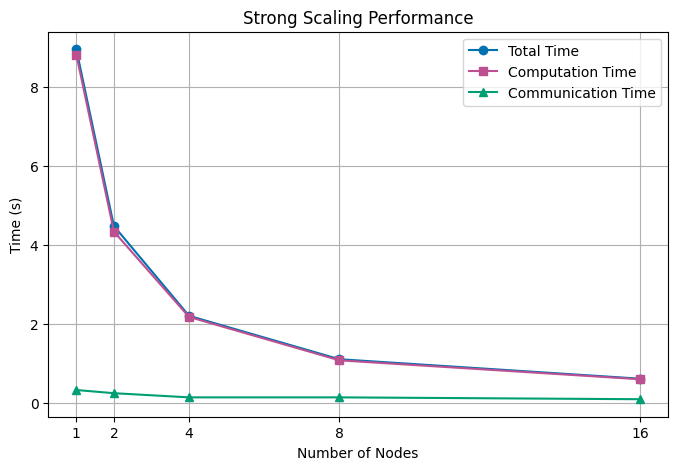

In [66]:
df_strong = pd.read_csv("output/strong_scaling_10000.csv")

TASKS_PER_NODE = 8
df_strong["Nodes"] = df_strong["Ntasks"] // TASKS_PER_NODE
df_strong_sorted = df_strong.sort_values("Nodes")

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_total_time"], marker="o", color=colors["total"], label="Total Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Computation_time"], marker="s", color=colors["comp"], label="Computation Time")
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Max_Communication_time"], marker="^", color=colors["comm"], label="Communication Time")
# Annotate each point with percentage
#for i, row in df_strong_sorted.iterrows():
#    percent = 100 * row["Max_Communication_time"] / row["Max_total_time"]
#    plt.text(row["Nodes"], row["Max_Communication_time"] + 0.05, f"{percent:.1f}%", ha='center', fontsize=9)

plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Strong Scaling Performance")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

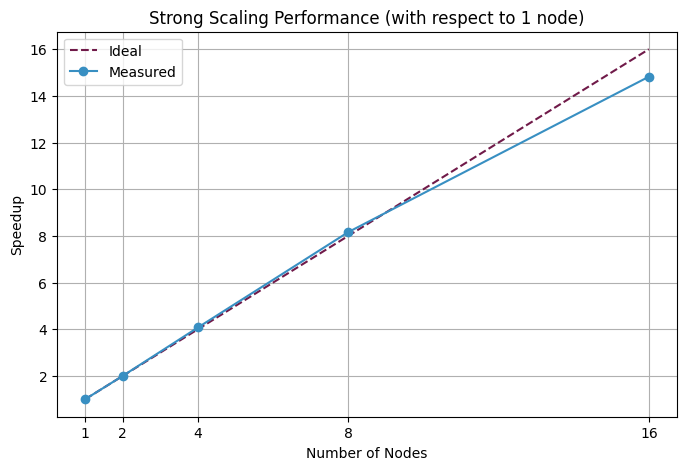

In [67]:
# speedup
t1_strong = df_strong_sorted["Max_total_time"].iloc[0]  # time with 1 node
df_strong_sorted["Speedup"] = t1_strong / df_strong_sorted["Max_total_time"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Nodes"], color=colors["ideal"], linestyle='--', label='Ideal')
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Speedup"], marker="o", color=colors["measured"], label="Measured")
plt.xlabel("Number of Nodes")
plt.ylabel("Speedup")
plt.title("Strong Scaling Performance (with respect to 1 node)")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.show()

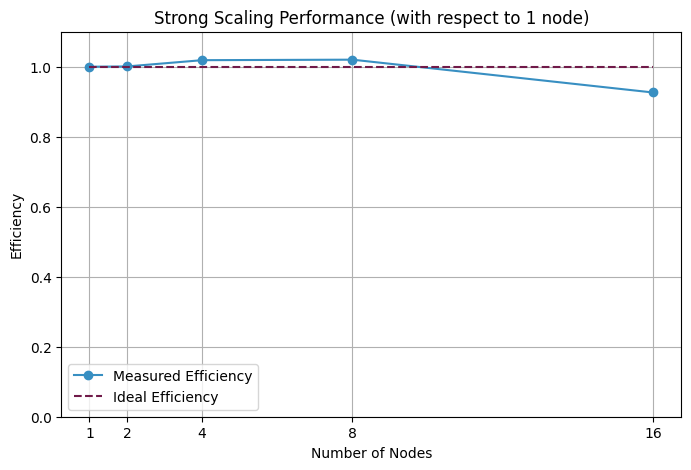

In [68]:
# Efficiency
df_strong_sorted["Efficiency"] = df_strong_sorted["Speedup"] / df_strong_sorted["Nodes"]

plt.figure(figsize=(8,5))
plt.plot(df_strong_sorted["Nodes"], df_strong_sorted["Efficiency"], marker="o", color=colors["measured"], label="Measured Efficiency")
plt.plot(df_strong_sorted["Nodes"], [1]*len(df_strong_sorted), color=colors["ideal"], linestyle='--', label='Ideal Efficiency')
plt.xlabel("Number of Nodes")
plt.ylabel("Efficiency")
plt.title("Strong Scaling Performance (with respect to 1 node)")
plt.legend()
plt.grid(True)
plt.xticks(df_strong_sorted["Nodes"])
plt.ylim(0, 1.1)
plt.show()
